In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

2. Write your own code for a function to do a linear interpolation from an input set of datapoints
with (𝑥, 𝑦) coordinates, to return the value of 𝑦 at any requested value of 𝑥 that is within the
domain of the input dataset. Extrapolation is when you try to predict values of 𝑦 at values of
𝑥 that fall outside the domain of your dataset. Consider whether or when you would think
that's ok to do. Adopt some assumption and write your code to deal with extrapolation (e.g.,
you could forbid users from doing this; you could assume values continue with a constant
slope from the last points; you could assume a constant value from the last points; or you
could make other assumptions).

In [ ]:
#function for linear interpolation
def linear_interp():
    ai = (yi1-yi)/(xi1-xi)
    g = ai*(x-xi)+yi

    
    

2a. Consider the dataset in the file HW01_data.txt (provided separately). You may
input these values in your code by hand or write a routine to read in this file. Use your
code to interpolate the data to at least 10 times higher resolution (i.e., 10 times more
points than the dataset, within the same domain). Plot the dataset, and overplot your own
linear-interpolation points. Make a distinction between the original points and your
interpolated points.

In [3]:
data = np.genfromtxt("HW01_data.txt",skip_header=1) #read txt file
x_vals = [] #empty array for x-vals
y_vals = [] #empty array for y-vals

#loop to append x, y-vals from data
for i, j in data:
    x_vals.append(i) 
    y_vals.append(j)

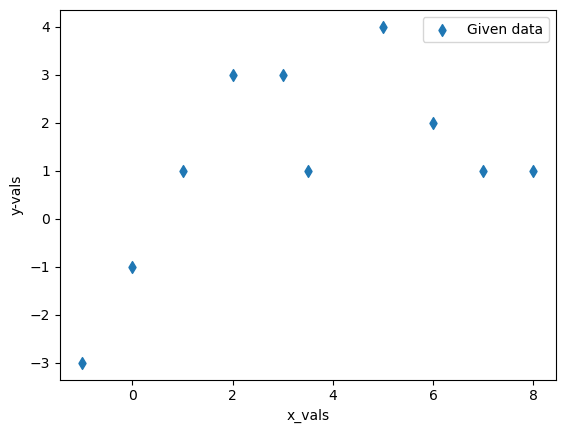

In [4]:
plt.scatter(x_vals,y_vals,marker="d",label="Given data")
#plt.scatter(x,y,marker="triangle",label="My interpolated points")
plt.xlabel("x_vals")
plt.ylabel("y-vals")
plt.legend()

(b) [1 pts] Use an off-the-shelf code for doing a cubic spline interpolation of the data (e.g.,
using a library in Python or MATLAB). Plot the cubic spline interpolation on top of the
dataset, again making a distinction between the dataset and the interpolation (here you
can draw the spline as a continuous line, if you want).

In [48]:
cs = CubicSpline(x_vals, y_vals) #scipy cubic spline for given data
xs = np.arange(-1.5, 8.5, 0.1) #x-vals for plotting purposes only

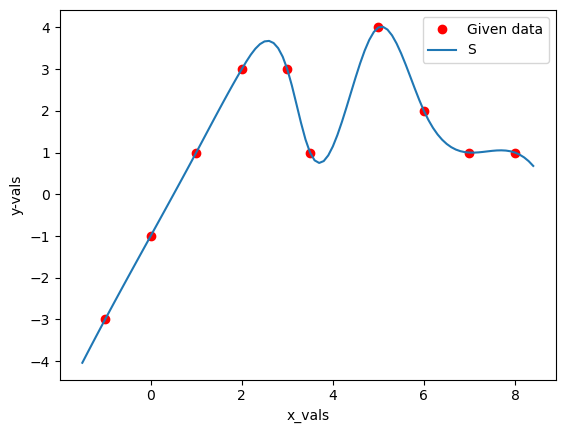

In [50]:
plt.plot(x_vals,y_vals,"ro",label="Given data")
plt.plot(xs, cs(xs), label="S")
plt.xlabel("x_vals")
plt.ylabel("y-vals")
plt.legend()

Consider the following function
$$y = \sin{\frac{\pi}{2}x}+\frac{x}{2}$$
Create a dataset that samples this function at every integer from 0 to 10.

In [60]:
#Given function
def func3(x):
    return np.sin((np.pi/2)*x)+(x/2)

In [68]:
nums = np.array([0,1,2,3,4,5,6,7,8,9,10])
func_nums = func3(nums)

(a) Plot your dataset, and overplot the data interpolated to 10 times higher resolution,
using both your linear code and an off-the-shelf cubic spline.

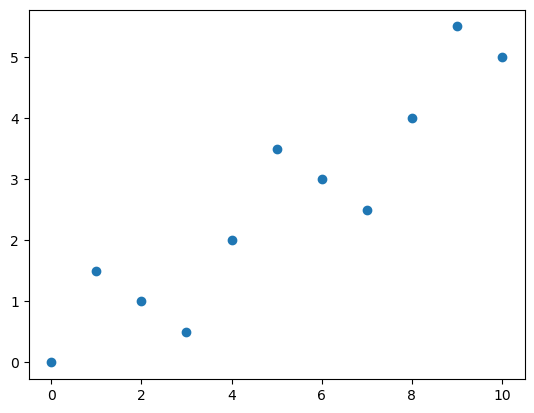

In [73]:
plt.plot(nums,func_nums,"o")

(b) Plot the relative error between your interpolated values (both linear and cubic
spline on the same plot) and the true function, in the domain 𝑥 = [0, 10]. The relative
error is the difference between interpolated values and the true value from the function,
divided by the true value. Comment on what the plot shows.